In [1]:
import argparse
import os
import pickle
import pprint
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *


def set_dates(df, time, mind, maxd, isIndex=False):
    if isIndex:
        newdf = df[(df.index>=mind) & (df.index<=maxd)]
    else:
        newdf = df[(df[time]>=mind) & (df[time]<=maxd)]

    return newdf


data_dir = '../../data'
country = pd.read_csv(os.path.join(data_dir, 'COVID_Cases_Restricted_Detailed_12312020.csv'), parse_dates=['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'cdc_case_earliest_dt'])


print('all cases', country.shape)
percent_missing = country.isnull().sum() * 100 / len(country)
percent_missing
print(country.shape)

country = country[~country['res_state'].isin(['CT','IL','NJ'])]
print(country.shape)

min_date = pd.Timestamp('2020-04-01') - pd.Timedelta(days=6)
max_date = pd.Timestamp('2020-12-01')

country = country[country['current_status']=='Laboratory-confirmed case']


country = set_dates(country, 'cdc_case_earliest_dt', min_date, max_date)
print(country.shape)



country['age_group'] = country['age_group'].astype('category')
country['age_group'].cat.categories
country.loc[country['age_group'].isnull(), 'age_group'] = 'Unknown'
country['age_group'].cat.rename_categories({'Unknown': '_' + 'Unknown'}, inplace=True)
country['age_group'].cat.categories

#country['age_group']
country['age_group'].cat.rename_categories({'0 - 9 Years':'0-9', 
                                       '10 - 19 Years':'10-19',
                                       '20 - 29 Years':'20-29',
                                       '30 - 39 Years':'30-39',
                                       '40 - 49 Years':'40-49', 
                                       '50 - 59 Years':'50-59',
                                       '60 - 69 Years':'60-69',
                                       '70 - 79 Years':'70-79',
                                       '80+ Years':'80+'}, inplace=True)
country = country.rename(columns={'age_group':'Age_group', 
                                    'sex': 'Gender',
                                    'hosp_yn': 'Hospitalized',
                                    'death_yn': 'Died',
                                    'current_status': 'Case'})
country = country.reset_index()

all cases (13415838, 32)
(13415838, 32)
(11870290, 32)
(9099083, 32)


In [2]:
country['hosp_na'] = 0

country.loc[(country['Hospitalized'].isna()) | (country['Hospitalized']=='Missing'), 'hosp_na'] = 1

df = country.set_index('cdc_case_earliest_dt')

#df


<AxesSubplot:xlabel='cdc_case_earliest_dt'>

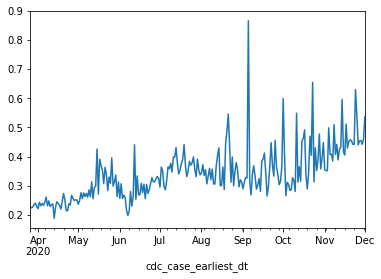

In [3]:
df = df.sort_values(by='cdc_case_earliest_dt')[['hosp_na']]
df.groupby('cdc_case_earliest_dt')['hosp_na'].mean().plot()


In [4]:
country

,index,race_ethnicity_combined,Case,cdc_case_earliest_dt,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,icu_yn,...,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,Age_group,hosp_na
0,0,Unknown,Laboratory-confirmed case,2020-09-13,2020-09-13,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
1,1,Unknown,Laboratory-confirmed case,2020-09-15,2020-09-15,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
2,2,Unknown,Laboratory-confirmed case,2020-10-11,2020-10-11,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
3,3,Unknown,Laboratory-confirmed case,2020-10-01,2020-10-01,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
4,4,Unknown,Laboratory-confirmed case,2020-07-31,2020-07-31,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099078,13415832,NaN,Laboratory-confirmed case,2020-06-11,2020-06-11,Male,NaT,NaT,No,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,0
9099079,13415833,NaN,Laboratory-confirmed case,2020-11-23,2020-12-01,Male,2020-11-23,NaT,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,0
9099080,13415835,NaN,Laboratory-confirmed case,2020-05-22,2020-05-26,Male,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,1
9099081,13415836,NaN,Laboratory-confirmed case,2020-06-23,2020-06-28,Male,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,1


In [5]:
min_date

Timestamp('2020-03-26 00:00:00')

In [6]:
import argparse
import os
import pickle
import pprint
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from utils import *

DATA_DIR = "../../../florida/data/"
time = 'Case_'
#print(time)
florida= pd.read_csv(os.path.join(
        DATA_DIR, 'florida_2021-01-05-15-35-01.csv'),index_col=False, parse_dates=[time, "ChartDate"])
florida["Age_group"] = florida["Age_group"].astype('category')
print(florida['Hospitalized'].value_counts())
print(florida['Hospitalized'].unique()) # 'YES'=1, else = 0
print(florida['Died'].unique()) # 'Yes'=1, nan = 0

#florida['Hospitalized'].isna()




florida.loc[florida['Hospitalized'].isna(), 'Hospitalized'] = 'Missing'
florida['Hospitalized'].value_counts()/len(florida)
print(florida.shape)
florida = set_dates(florida, 'Case_', min_date, max_date)
print(florida.shape)


florida['Age_group'] = florida['Age'].apply(lambda x: '0-9' if x < 10 
                                                           else ('10-19' if x < 20 
                                                                else('20-29'if x < 30 
                                                                    else('30-39' if x <40
                                                                        else('40-49' if x < 50
                                                                            else('50-59' if x < 60
                                                                                 else '60-69' if x<70
                                                                                    else '70-79' if x<80
                                                                                        else '80+' if not pd.isnull(x) 
                                                                                             else '_Unknown'))))))

florida['Age_group'] = florida['Age_group'].astype('category')
florida['Age_group'].cat.categories
order_cat = ['0-9',
                                             '10-19',
                                             '20-29',
                                             '30-39',
                                             '40-49',
                                             '50-59',
                                             '60-69',
                                             '70-79',
                                             '80+',
                                             '_Unknown']#[::-1]
florida['Age_group'].cat.reorder_categories(order_cat, inplace=True)
florida = florida.reset_index()

NO         700981
UNKNOWN    612231
YES         64783
Name: Hospitalized, dtype: int64
['NO' 'UNKNOWN' 'YES' nan]
[nan 'Yes' 'Recent']
(1392123, 15)
(1004818, 15)


In [7]:
florida

,index,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case,Contact,Case_,EventDate,ChartDate
0,5,Marion,55.0,50-59,Male,FL resident,Unknown,NaN,NO,NO,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-18 00:00:00,2020-11-20 05:00:00
1,6,Broward,16.0,10-19,Female,FL resident,No,NaN,NO,NO,NaN,Yes,Yes,2020-11-20 05:00:00,2020-11-14 00:00:00,2020-11-20 05:00:00
2,7,Brevard,53.0,50-59,Female,FL resident,No,NaN,UNKNOWN,UNKNOWN,NaN,Yes,UNKNOWN,2020-11-20 05:00:00,2020-11-20 22:05:07,2020-11-20 05:00:00
3,8,Brevard,39.0,30-39,Female,FL resident,No,NaN,NO,NO,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-19 00:00:00,2020-11-20 05:00:00
4,9,Palm Beach,24.0,20-29,Male,FL resident,Unknown,NaN,NO,NO,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-20 00:00:00,2020-11-20 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004813,1392118,Unknown,19.0,10-19,Male,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-08-08 05:00:00,2020-08-08 00:30:42,2020-08-08 05:00:00
1004814,1392119,Unknown,71.0,70-79,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-09-07 05:00:00,2020-09-07 05:17:10,2020-09-07 05:00:00
1004815,1392120,Unknown,17.0,10-19,Male,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-07-31 05:00:00,2020-07-31 14:01:53,2020-07-31 05:00:00
1004816,1392121,Unknown,52.0,50-59,Female,Non-FL resident,Unknown,NaN,UNKNOWN,UNKNOWN,NaN,Yes,NaN,2020-10-14 05:00:00,2020-10-14 14:38:34,2020-10-14 05:00:00


In [8]:
florida['Hospitalized'].unique()

array(['NO', 'UNKNOWN', 'YES', 'Missing'], dtype=object)

In [9]:
country['Hospitalized'].unique()

array(['Missing', 'No', 'Yes', 'Unknown'], dtype=object)

In [10]:
def as_category(df, var):
    df[var] = df[var].astype('category')
    return df

#new
florida.loc[florida['Died']=='Recent', 'Died'] ='Yes'

florida['Hospitalized'] = florida['Hospitalized'].astype('category')

florida['Hospitalized'].cat.rename_categories({'UNKNOWN':'Unknown', 'NO':'No', 'YES':'Yes'}, inplace=True)
country['Hospitalized'] = country['Hospitalized'].astype('category')
#florida['Died'] = florida['Hospitalized'].astype('category')

florida = as_category(florida, 'Died')
florida['Died'].cat.rename_categories({'UNKNOWN':'Unknown', 'NO':'No', 'YES':'Yes'}, inplace=True)


In [11]:
florida

,index,County,Age,Age_group,Gender,Jurisdiction,Travel_related,Origin,EDvisit,Hospitalized,Died,Case,Contact,Case_,EventDate,ChartDate
0,5,Marion,55.0,50-59,Male,FL resident,Unknown,NaN,NO,No,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-18 00:00:00,2020-11-20 05:00:00
1,6,Broward,16.0,10-19,Female,FL resident,No,NaN,NO,No,NaN,Yes,Yes,2020-11-20 05:00:00,2020-11-14 00:00:00,2020-11-20 05:00:00
2,7,Brevard,53.0,50-59,Female,FL resident,No,NaN,UNKNOWN,Unknown,NaN,Yes,UNKNOWN,2020-11-20 05:00:00,2020-11-20 22:05:07,2020-11-20 05:00:00
3,8,Brevard,39.0,30-39,Female,FL resident,No,NaN,NO,No,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-19 00:00:00,2020-11-20 05:00:00
4,9,Palm Beach,24.0,20-29,Male,FL resident,Unknown,NaN,NO,No,NaN,Yes,NO,2020-11-20 05:00:00,2020-11-20 00:00:00,2020-11-20 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004813,1392118,Unknown,19.0,10-19,Male,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-08-08 05:00:00,2020-08-08 00:30:42,2020-08-08 05:00:00
1004814,1392119,Unknown,71.0,70-79,Female,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-09-07 05:00:00,2020-09-07 05:17:10,2020-09-07 05:00:00
1004815,1392120,Unknown,17.0,10-19,Male,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-07-31 05:00:00,2020-07-31 14:01:53,2020-07-31 05:00:00
1004816,1392121,Unknown,52.0,50-59,Female,Non-FL resident,Unknown,NaN,UNKNOWN,Unknown,NaN,Yes,NaN,2020-10-14 05:00:00,2020-10-14 14:38:34,2020-10-14 05:00:00


In [12]:
def reorder_cat(df, var, order):
    #print(df)
    df[var].cat.reorder_categories(order, inplace=True)
    return df

florida = reorder_cat(florida, 'Hospitalized', ['Yes', 'No', 'Unknown', 'Missing'])
country = reorder_cat(country, 'Hospitalized', ['Yes', 'No', 'Unknown', 'Missing'])


In [13]:
hosp = {}
hosp_pec = {}
keys = ['florida', 'national', 'na_died']
orders = ['Yes', 'No', 'Unknown', 'Missing']
for i, df in enumerate([florida, country, country]):
    #'{} ({}%)'.format(df['death_yn'].value_counts(), df['death_yn'].value_counts()/len(df))
    if keys[i]!='na_died':
        cts = df['Hospitalized'].value_counts()#.tolist()
        ls = []
        for j, o in enumerate(orders):
            #        print(cts)
            ls.append(cts[o])

            hosp[keys[i]] = ls
            #print(df['Hospitalized'].value_counts())
    else:
        cts = df['Died'].value_counts()#.tolist()
        ls = []
        for j, o in enumerate(orders):
            #        print(cts)
            ls.append(cts[o])

            hosp[keys[i]] = ls
            #print(df['Died'].value_counts())
            
hosp
hosp = pd.DataFrame.from_dict(hosp)

In [14]:
f_d = []
print(florida['Died'].value_counts()[0])
f_d.append(florida['Died'].value_counts()[0])
f_d.append(0)
f_d.append(0)
f_d.append(sum(florida['Died'].isna()))
hosp['f_d'] = f_d
print(hosp)

21028
   florida  national  na_died     f_d
0    56673    491679   166381   21028
1   538428   3673897  4505642       0
2   402616   1413229   972312       0
3     7101   3520278  3454748  983790


In [15]:
hosp['level']  = orders
hosp['fl_p'] = hosp['florida'] / len(florida)
hosp['na_p'] = hosp['national'] / len(country)
hosp['na_p_d'] = hosp['na_died'] / len(country)
hosp['f_p_d'] = hosp['f_d']/ len(florida)
print(hosp)

   florida  national  na_died     f_d    level      fl_p      na_p    na_p_d  \
0    56673    491679   166381   21028      Yes  0.056401  0.054036  0.018285   
1   538428   3673897  4505642       0       No  0.535846  0.403766  0.495175   
2   402616   1413229   972312       0  Unknown  0.400685  0.155316  0.106858   
3     7101   3520278  3454748  983790  Missing  0.007067  0.386883  0.379681   

      f_p_d  
0  0.020927  
1  0.000000  
2  0.000000  
3  0.979073  


In [16]:
hosp['Florida'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['florida'], 100*r['fl_p']), axis=1)
hosp['Country'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['national'], 100*r['na_p']), axis=1)
hosp['na_d'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['na_died'], 100*r['na_p_d']), axis=1)
hosp['fl_d'] = hosp.apply(lambda r: "{} ({:.1f}%)".format(r['f_d'], 100*r['f_p_d']), axis=1)

hosp = hosp.set_index('level')
hosp

,florida,national,na_died,f_d,fl_p,na_p,na_p_d,f_p_d,Florida,Country,na_d,fl_d
level,,,,,,,,,,,,
Yes,56673,491679,166381,21028,0.056401,0.054036,0.018285,0.020927,56673 (5.6%),491679 (5.4%),166381 (1.8%),21028 (2.1%)
No,538428,3673897,4505642,0,0.535846,0.403766,0.495175,0.000000,538428 (53.6%),3673897 (40.4%),4505642 (49.5%),0 (0.0%)
Unknown,402616,1413229,972312,0,0.400685,0.155316,0.106858,0.000000,402616 (40.1%),1413229 (15.5%),972312 (10.7%),0 (0.0%)
Missing,7101,3520278,3454748,983790,0.007067,0.386883,0.379681,0.979073,7101 (0.7%),3520278 (38.7%),3454748 (38.0%),983790 (97.9%)


In [17]:
print(hosp[['Florida', 'Country', 'fl_d', 'na_d']].to_latex())

\begin{tabular}{lllll}
\toprule
{} &         Florida &          Country &            fl\_d &             na\_d \\
level   &                 &                  &                 &                  \\
\midrule
Yes     &    56673 (5.6\%) &    491679 (5.4\%) &    21028 (2.1\%) &    166381 (1.8\%) \\
No      &  538428 (53.6\%) &  3673897 (40.4\%) &        0 (0.0\%) &  4505642 (49.5\%) \\
Unknown &  402616 (40.1\%) &  1413229 (15.5\%) &        0 (0.0\%) &   972312 (10.7\%) \\
Missing &     7101 (0.7\%) &  3520278 (38.7\%) &  983790 (97.9\%) &  3454748 (38.0\%) \\
\bottomrule
\end{tabular}



In [18]:
df

,index,race_ethnicity_combined,Case,cdc_case_earliest_dt,cdc_report_dt,Gender,onset_dt,pos_spec_dt,Hospitalized,icu_yn,...,nauseavomit_yn,headache_yn,abdom_yn,diarrhea_yn,medcond_yn,county_fips_code,res_county,res_state,Age_group,hosp_na
0,0,Unknown,Laboratory-confirmed case,2020-09-13,2020-09-13,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
1,1,Unknown,Laboratory-confirmed case,2020-09-15,2020-09-15,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
2,2,Unknown,Laboratory-confirmed case,2020-10-11,2020-10-11,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
3,3,Unknown,Laboratory-confirmed case,2020-10-01,2020-10-01,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
4,4,Unknown,Laboratory-confirmed case,2020-07-31,2020-07-31,Female,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,72005.0,AGUADILLA,PR,30-39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9099078,13415832,NaN,Laboratory-confirmed case,2020-06-11,2020-06-11,Male,NaT,NaT,No,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,0
9099079,13415833,NaN,Laboratory-confirmed case,2020-11-23,2020-12-01,Male,2020-11-23,NaT,Yes,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,0
9099080,13415835,NaN,Laboratory-confirmed case,2020-05-22,2020-05-26,Male,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,1
9099081,13415836,NaN,Laboratory-confirmed case,2020-06-23,2020-06-28,Male,NaT,NaT,Missing,Missing,...,Missing,Missing,Missing,Missing,Missing,4027.0,Yuma,AZ,80+,1


In [19]:
df = hosp[['Florida', 'fl_d', 'Country', 'na_d']]

multindex = list(zip(['Florida']*2 + ['Country']*2, ['Hospitalization', 'Death']*2))
mulindex = pd.MultiIndex.from_tuples(multindex, names=['data', 'outcome'])
df.columns = mulindex
print(df.to_latex())

\begin{tabular}{lllll}
\toprule
data & \multicolumn{2}{l}{Florida} & \multicolumn{2}{l}{Country} \\
outcome & Hospitalization &           Death &  Hospitalization &            Death \\
level   &                 &                 &                  &                  \\
\midrule
Yes     &    56673 (5.6\%) &    21028 (2.1\%) &    491679 (5.4\%) &    166381 (1.8\%) \\
No      &  538428 (53.6\%) &        0 (0.0\%) &  3673897 (40.4\%) &  4505642 (49.5\%) \\
Unknown &  402616 (40.1\%) &        0 (0.0\%) &  1413229 (15.5\%) &   972312 (10.7\%) \\
Missing &     7101 (0.7\%) &  983790 (97.9\%) &  3520278 (38.7\%) &  3454748 (38.0\%) \\
\bottomrule
\end{tabular}



In [20]:
florida['Died'] 



0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1004813    NaN
1004814    NaN
1004815    NaN
1004816    NaN
1004817    NaN
Name: Died, Length: 1004818, dtype: category
Categories (1, object): ['Yes']

In [21]:
country['Died'].value_counts()

No         4505642
Missing    3454748
Unknown     972312
Yes         166381
Name: Died, dtype: int64

In [22]:
# fill in the categories